In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [3]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/nuevo4c/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4c/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            pass

In [4]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,...,list_m,list_T,Jaro-Winkler_rit,rel_conceptuales,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,0.987,0.000,0.000000,0.000000,0.000000,0,0.000000,0,...,0,27,0.333333,0,0,,0,,0.500000,YES
1,0.000000,0.000000,1.687,0.000,0.000000,0.000000,0.000000,1,0.000000,0,...,0,27,1.000000,0,0,,0,,0.333333,NO
2,1.911999,1.455456,1.962,2.437,3.867700,0.006142,0.465936,1,0.052632,0,...,1,24,0.800000,0,0,,0,,0.250000,UNKNOWN
3,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,0,0.000000,0,...,0,38,1.000000,0,0,,0,,0.333333,YES
4,1.148566,1.449291,1.949,2.419,3.937175,0.005394,0.381601,0,0.111111,0,...,1,13,0.600000,0,0,,0,,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.397277,1.420225,1.900,1.855,3.849615,0.003770,0.329502,0,0.083333,0,...,1,16,0.200000,0,0,,0,,0.500000,UNKNOWN
796,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,0,0.000000,0,...,0,23,1.000000,0,0,,0,,0.666667,YES
797,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,0,0.000000,0,...,0,19,0.666667,0,0,,0,,0.500000,UNKNOWN
798,0.000000,0.000000,1.667,0.000,0.000000,0.000000,0.000000,0,0.000000,0,...,0,22,0.400000,0,0,,0,,1.000000,NO


<Axes: title={'center': 'Jaro-Winkler_rit'}, xlabel='clases'>

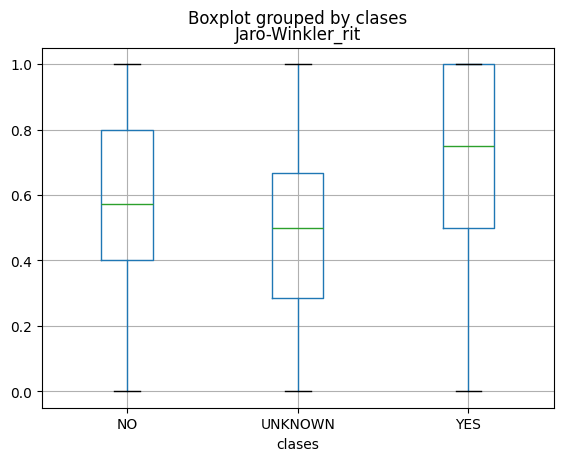

In [5]:
train.boxplot(by="clases",column="Jaro-Winkler_rit")

## Eliminar características

In [6]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
#train=train.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,...,list_m,list_T,Jaro-Winkler_rit,rel_conceptuales,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,0.987,0.000,0.000000,0.000000,0.000000,0,0.000000,0,...,0,27,0.333333,0,0,,0,,0.500000,YES
1,0.000000,0.000000,1.687,0.000,0.000000,0.000000,0.000000,1,0.000000,0,...,0,27,1.000000,0,0,,0,,0.333333,NO
2,1.911999,1.455456,1.962,2.437,3.867700,0.006142,0.465936,1,0.052632,0,...,1,24,0.800000,0,0,,0,,0.250000,UNKNOWN
3,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,0,0.000000,0,...,0,38,1.000000,0,0,,0,,0.333333,YES
4,1.148566,1.449291,1.949,2.419,3.937175,0.005394,0.381601,0,0.111111,0,...,1,13,0.600000,0,0,,0,,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.397277,1.420225,1.900,1.855,3.849615,0.003770,0.329502,0,0.083333,0,...,1,16,0.200000,0,0,,0,,0.500000,UNKNOWN
796,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,0,0.000000,0,...,0,23,1.000000,0,0,,0,,0.666667,YES
797,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,0,0.000000,0,...,0,19,0.666667,0,0,,0,,0.500000,UNKNOWN
798,0.000000,0.000000,1.667,0.000,0.000000,0.000000,0.000000,0,0.000000,0,...,0,22,0.400000,0,0,,0,,1.000000,NO


In [7]:
train[(train["list_m"]!=0) & (train["clases"]=="YES")]

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,...,list_m,list_T,Jaro-Winkler_rit,rel_conceptuales,negT,verbT,negH,verbH,overlap_ent,clases
4,1.148566,1.449291,1.949,2.419,3.937175,0.005394,0.381601,0,0.111111,0,...,1,13,0.600000,0,0,,0,,0.666667,YES
12,0.576368,1.449391,1.957,1.406,3.789053,0.004267,0.123798,0,0.062500,0,...,1,21,1.000000,0,0,,0,,0.666667,YES
16,0.922990,1.460132,2.151,1.722,3.917381,0.004689,0.278294,0,0.100000,1,...,1,16,0.714286,0,0,,0,,0.750000,YES
25,1.660857,1.464642,2.498,1.353,3.887436,0.004578,0.291467,0,0.033333,0,...,1,33,0.500000,0,0,,0,,0.666667,YES
27,-0.094830,1.481927,2.117,1.157,3.875875,0.003966,0.051358,0,0.100000,0,...,1,13,0.000000,0,0,,0,,0.333333,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0.740566,1.453204,2.232,1.522,3.911731,0.003056,0.219934,0,0.100000,0,...,1,16,0.857143,0,0,,0,,0.750000,YES
779,2.232058,1.463399,2.044,2.018,3.933285,0.003553,0.389897,0,0.052632,0,...,1,25,0.571429,0,0,,0,,0.500000,YES
791,1.094504,1.452324,2.180,1.457,3.949004,0.003593,0.191041,1,0.076923,0,...,1,18,0.833333,0,1,make,0,,0.250000,YES
794,1.479280,1.436944,1.805,1.826,3.875939,0.005204,0.309267,1,0.076923,0,...,1,27,0.769231,0,0,,0,,0.600000,YES


In [8]:
train.columns

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'rel_conceptuales',
       'negT', 'verbT', 'negH', 'verbH', 'overlap_ent', 'clases'],
      dtype='object')

In [9]:
train=train.drop(["verbT","verbH"],axis=1)

In [10]:
#train = train[['list_incomp','list_incomp','Jaro-Winkler_rit','list_m','negT', 'negH','clases']]
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,rel_conceptuales,negT,negH,overlap_ent,clases
0,0.000000,0.000000,0.987,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,27,0.333333,0,0,0,0.500000,YES
1,0.000000,0.000000,1.687,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,27,1.000000,0,0,0,0.333333,NO
2,1.911999,1.455456,1.962,2.437,3.867700,0.006142,0.465936,1,0.052632,0,5,1,24,0.800000,0,0,0,0.250000,UNKNOWN
3,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,38,1.000000,0,0,0,0.333333,YES
4,1.148566,1.449291,1.949,2.419,3.937175,0.005394,0.381601,0,0.111111,0,5,1,13,0.600000,0,0,0,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.397277,1.420225,1.900,1.855,3.849615,0.003770,0.329502,0,0.083333,0,5,1,16,0.200000,0,0,0,0.500000,UNKNOWN
796,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,0,0.000000,0,9,0,23,1.000000,0,0,0,0.666667,YES
797,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,19,0.666667,0,0,0,0.500000,UNKNOWN
798,0.000000,0.000000,1.667,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,22,0.400000,0,0,0,1.000000,NO


In [11]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [12]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [13]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,rel_conceptuales,negT,negH,overlap_ent
sumas,1.000000,0.357202,0.128243,0.777209,0.693010,0.243492,0.826369,-0.039302,0.055284,-0.026073,-0.001597,0.344176,0.315710,-0.213406,0.042367,0.061478,0.047147,-0.188799
distancias,0.357202,1.000000,-0.040283,0.606934,0.606371,0.351648,0.425791,0.199658,0.519274,0.055632,0.408080,0.998162,-0.040181,-0.427863,0.097260,-0.022814,-0.003006,-0.378796
entropia_total,0.128243,-0.040283,1.000000,0.134949,0.080370,-0.006707,0.135685,0.001976,0.000537,-0.029542,0.124274,-0.054957,-0.033983,0.042591,0.040545,0.073999,0.004923,0.076146
entropias,0.777209,0.606934,0.134949,1.000000,0.949199,0.422647,0.843046,0.066538,0.281077,0.003103,0.074938,0.590962,-0.013971,-0.361972,0.093168,0.004054,0.043074,-0.304448
mutinf,0.693010,0.606371,0.080370,0.949199,1.000000,0.443388,0.782281,0.082716,0.306389,-0.007260,0.086008,0.588599,-0.021318,-0.362480,0.101151,-0.009433,0.035912,-0.310905
mearts,0.243492,0.351648,-0.006707,0.422647,0.443388,1.000000,0.295704,0.046718,0.267787,0.057472,0.076650,0.362825,-0.054694,-0.218478,0.009863,-0.043765,-0.001604,-0.188161
max_info,0.826369,0.425791,0.135685,0.843046,0.782281,0.295704,1.000000,0.015796,0.150396,-0.027269,0.012043,0.412283,0.059576,-0.268224,0.040115,0.026936,0.063909,-0.214003
list_comp,-0.039302,0.199658,0.001976,0.066538,0.082716,0.046718,0.015796,1.000000,0.205678,-0.014837,0.215536,0.199736,-0.083977,-0.085538,0.030207,0.005149,-0.016692,-0.284510
diferencias,0.055284,0.519274,0.000537,0.281077,0.306389,0.267787,0.150396,0.205678,1.000000,0.037262,0.309788,0.523337,-0.251166,-0.207660,0.096869,-0.045850,0.001247,-0.166092
list_incomp,-0.026073,0.055632,-0.029542,0.003103,-0.007260,0.057472,-0.027269,-0.014837,0.037262,1.000000,0.061734,0.060876,-0.015018,-0.054153,0.058176,0.021907,0.074912,0.026354


<Axes: >

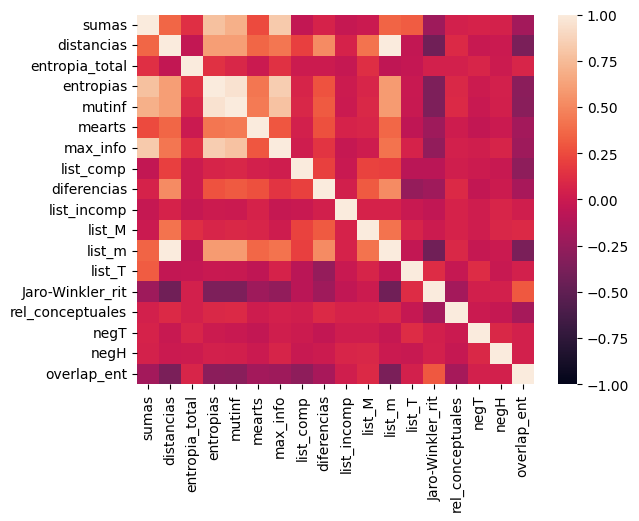

In [14]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [15]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,rel_conceptuales,negT,negH,overlap_ent
sumas,1.000000,0.357202,0.128243,0.777209,0.693010,0.243492,0.826369,-0.039302,0.055284,-0.026073,-0.001597,0.344176,0.315710,-0.213406,0.042367,0.061478,0.047147,-0.188799
distancias,0.357202,1.000000,-0.040283,0.606934,0.606371,0.351648,0.425791,0.199658,0.519274,0.055632,0.408080,0.998162,-0.040181,-0.427863,0.097260,-0.022814,-0.003006,-0.378796
entropia_total,0.128243,-0.040283,1.000000,0.134949,0.080370,-0.006707,0.135685,0.001976,0.000537,-0.029542,0.124274,-0.054957,-0.033983,0.042591,0.040545,0.073999,0.004923,0.076146
entropias,0.777209,0.606934,0.134949,1.000000,0.949199,0.422647,0.843046,0.066538,0.281077,0.003103,0.074938,0.590962,-0.013971,-0.361972,0.093168,0.004054,0.043074,-0.304448
mutinf,0.693010,0.606371,0.080370,0.949199,1.000000,0.443388,0.782281,0.082716,0.306389,-0.007260,0.086008,0.588599,-0.021318,-0.362480,0.101151,-0.009433,0.035912,-0.310905
mearts,0.243492,0.351648,-0.006707,0.422647,0.443388,1.000000,0.295704,0.046718,0.267787,0.057472,0.076650,0.362825,-0.054694,-0.218478,0.009863,-0.043765,-0.001604,-0.188161
max_info,0.826369,0.425791,0.135685,0.843046,0.782281,0.295704,1.000000,0.015796,0.150396,-0.027269,0.012043,0.412283,0.059576,-0.268224,0.040115,0.026936,0.063909,-0.214003
list_comp,-0.039302,0.199658,0.001976,0.066538,0.082716,0.046718,0.015796,1.000000,0.205678,-0.014837,0.215536,0.199736,-0.083977,-0.085538,0.030207,0.005149,-0.016692,-0.284510
diferencias,0.055284,0.519274,0.000537,0.281077,0.306389,0.267787,0.150396,0.205678,1.000000,0.037262,0.309788,0.523337,-0.251166,-0.207660,0.096869,-0.045850,0.001247,-0.166092
list_incomp,-0.026073,0.055632,-0.029542,0.003103,-0.007260,0.057472,-0.027269,-0.014837,0.037262,1.000000,0.061734,0.060876,-0.015018,-0.054153,0.058176,0.021907,0.074912,0.026354


In [16]:
coor=pd.DataFrame(np.tril(train_m,-1),index=train_m.columns,columns=train_m.columns)
coor

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,rel_conceptuales,negT,negH,overlap_ent
sumas,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
distancias,0.357202,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
entropia_total,0.128243,-0.040283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
entropias,0.777209,0.606934,0.134949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
mutinf,0.693010,0.606371,0.080370,0.949199,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
mearts,0.243492,0.351648,-0.006707,0.422647,0.443388,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max_info,0.826369,0.425791,0.135685,0.843046,0.782281,0.295704,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
list_comp,-0.039302,0.199658,0.001976,0.066538,0.082716,0.046718,0.015796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
diferencias,0.055284,0.519274,0.000537,0.281077,0.306389,0.267787,0.150396,0.205678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
list_incomp,-0.026073,0.055632,-0.029542,0.003103,-0.007260,0.057472,-0.027269,-0.014837,0.037262,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [17]:
cols=train_m.columns
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]>0.7:
            print(index,c,strings[c])

entropias sumas 0.7772088376511056
mutinf entropias 0.9491988973423324
max_info sumas 0.8263692959369743
max_info entropias 0.8430462202308492
max_info mutinf 0.7822813534316659
list_m distancias 0.9981619553136805


In [18]:
cols=train_m.columns
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]<-0.7:
            print(index,c,strings[c])

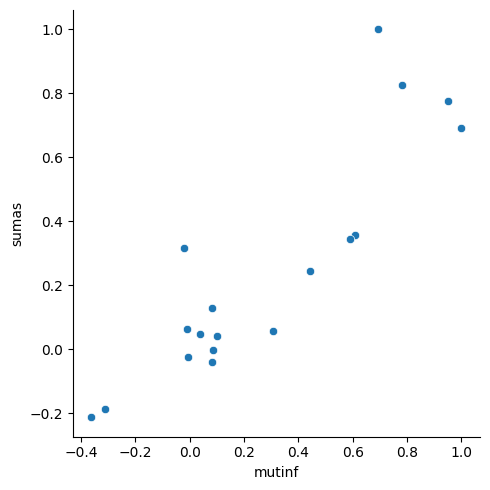

In [19]:
# Checar variables colineales
sns.relplot(data=train_m, x="mutinf", y="sumas")

In [20]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [21]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

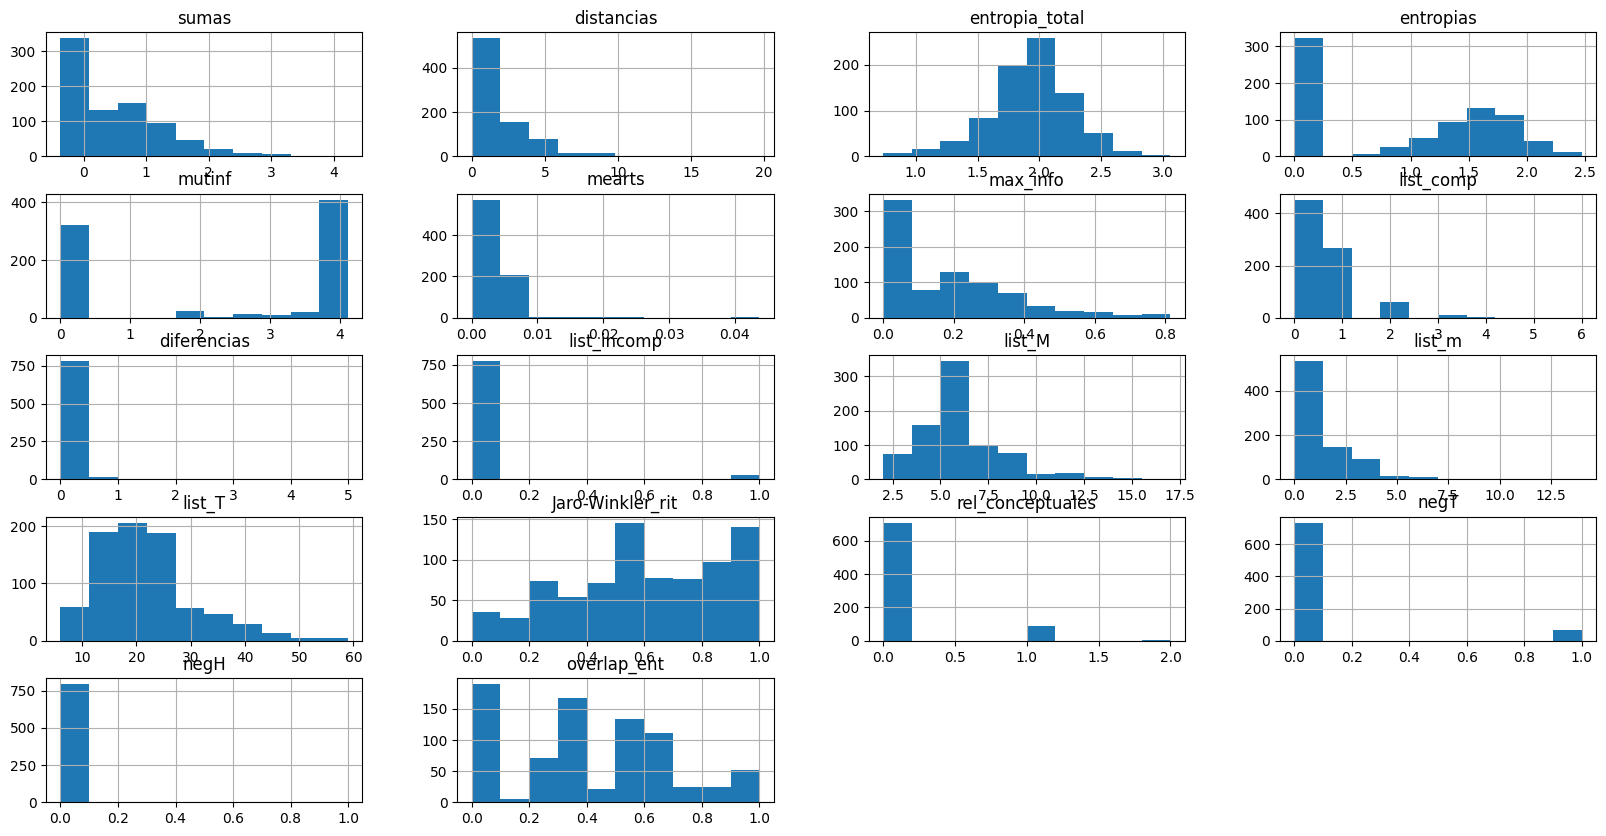

In [22]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [23]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/nuevo4c/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4c/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            pass

In [24]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,...,list_m,list_T,Jaro-Winkler_rit,rel_conceptuales,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,2.231,0.000,0.000000,0.000000,0.000000,1,0.000000,0,...,0,24,0.400000,0,0,,0,,0.666667,YES
1,0.000000,0.000000,2.069,0.000,0.000000,0.000000,0.000000,1,0.000000,0,...,0,24,0.800000,0,0,,0,,0.333333,YES
2,0.000000,0.000000,1.765,0.000,0.000000,0.000000,0.000000,0,0.000000,0,...,0,14,0.500000,0,0,,0,,0.666667,YES
3,0.000000,0.000000,2.012,0.000,0.000000,0.000000,0.000000,0,0.000000,0,...,0,20,0.666667,0,0,,0,,1.000000,YES
4,1.274136,1.457741,1.691,1.921,3.880129,0.004272,0.201056,0,0.058824,0,...,1,20,0.000000,0,0,,0,,1.000000,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,2.198,0.000,0.000000,0.000000,0.000000,1,0.000000,1,...,0,19,0.400000,0,1,rush,0,,0.500000,YES
796,0.000000,0.000000,1.580,0.000,0.000000,0.000000,0.000000,0,0.000000,0,...,0,25,0.666667,0,0,,0,,0.333333,NO
797,0.000000,0.000000,1.828,0.000,0.000000,0.000000,0.000000,0,0.000000,0,...,0,24,0.000000,0,0,,0,,0.666667,UNKNOWN
798,0.321690,1.443915,1.767,0.985,3.774718,0.005778,0.129923,0,0.142857,0,...,1,10,0.500000,0,0,,0,,0.666667,UNKNOWN


In [25]:
#test=test.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#test = test[['list_incomp','list_incomp','Jaro-Winkler_rit','list_m','negT', 'negH','clases']]



In [26]:
test=test.drop(["verbT","verbH"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,rel_conceptuales,negT,negH,overlap_ent,clases
0,0.000000,0.000000,2.231,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.400000,0,0,0,0.666667,YES
1,0.000000,0.000000,2.069,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.800000,0,0,0,0.333333,YES
2,0.000000,0.000000,1.765,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,14,0.500000,0,0,0,0.666667,YES
3,0.000000,0.000000,2.012,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,20,0.666667,0,0,0,1.000000,YES
4,1.274136,1.457741,1.691,1.921,3.880129,0.004272,0.201056,0,0.058824,0,4,1,20,0.000000,0,0,0,1.000000,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,2.198,0.000,0.000000,0.000000,0.000000,1,0.000000,1,5,0,19,0.400000,0,1,0,0.500000,YES
796,0.000000,0.000000,1.580,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,25,0.666667,0,0,0,0.333333,NO
797,0.000000,0.000000,1.828,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,24,0.000000,0,0,0,0.666667,UNKNOWN
798,0.321690,1.443915,1.767,0.985,3.774718,0.005778,0.129923,0,0.142857,0,4,1,10,0.500000,0,0,0,0.666667,UNKNOWN


In [27]:
test[(test["list_m"]==0) & (test["clases"]=="NO")].shape

(43, 19)

In [28]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [29]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    else:
        y_test.append(0)

In [30]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [31]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.        , 0.        , 0.32244365, ..., 0.        , 0.        ,
        0.5       ],
       [0.        , 0.        , 0.55112708, ..., 0.        , 0.        ,
        0.33333333],
       [0.4518141 , 0.0740187 , 0.640967  , ..., 0.        , 0.        ,
        0.25      ],
       ...,
       [0.        , 0.        , 0.48709572, ..., 0.        , 0.        ,
        0.5       ],
       [0.        , 0.        , 0.54459327, ..., 0.        , 0.        ,
        1.        ],
       [0.25992075, 0.07505317, 0.61548514, ..., 0.        , 0.        ,
        0.66666667]])

In [32]:
X_train.shape

(800, 18)

In [33]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [34]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [35]:
model.decision_function(X_train)

array([ 4.61867728e-01,  1.16930769e+00,  3.97813050e-01,  1.25359935e+00,
        2.94821709e-01,  1.21964230e+00,  6.12608654e-01, -5.77986277e-01,
        8.41292021e-01, -1.07900145e+00,  2.52106604e-02,  5.04028239e-01,
        5.83850047e-01, -1.43388652e-02, -1.22152914e+00,  6.97559663e-01,
        1.12401285e-01,  4.80747856e-01, -8.78424440e-01, -7.67258143e-03,
        1.24250100e+00,  4.81903817e-02,  6.64118231e-01,  1.14993069e+00,
        8.86695228e-01,  4.35137961e-01,  8.80399063e-01, -1.12125262e+00,
        3.52101880e-01, -3.27162272e-01,  1.17692537e+00,  1.71568960e-01,
        8.70180688e-01,  8.72972771e-01, -2.44130854e-01,  3.37162473e-02,
        1.37041924e+00,  7.60745527e-01,  2.43724001e-02,  1.27593006e+00,
        7.04772234e-01, -5.96260812e-03,  5.03723199e-01,  1.00874725e-01,
       -4.82671434e-01,  1.71150474e-01,  2.49401024e-01,  1.09737142e+00,
        4.65460417e-01,  6.61857306e-01, -9.00915536e-01,  7.59999270e-01,
       -1.44618940e+00,  

In [36]:
labels=train.columns[:-1]
labels

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'rel_conceptuales',
       'negT', 'negH', 'overlap_ent'],
      dtype='object')

In [37]:
model.classes_

array([0, 1])

In [38]:
model.coef_[0]

array([ 0.64078717, -2.39848993,  0.19225905, -0.22845156, -0.47246575,
       -1.82912999,  0.95647518, -0.07552766, -0.30779772, -0.42516447,
        0.51257805, -2.65757558,  0.40819194,  1.15449918, -0.73386103,
       -0.18452668, -0.47103487,  0.92344782])

In [39]:
coeficientes=model.coef_[0]

In [40]:
coeficientes

array([ 0.64078717, -2.39848993,  0.19225905, -0.22845156, -0.47246575,
       -1.82912999,  0.95647518, -0.07552766, -0.30779772, -0.42516447,
        0.51257805, -2.65757558,  0.40819194,  1.15449918, -0.73386103,
       -0.18452668, -0.47103487,  0.92344782])

In [41]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  13 Jaro-Winkler_rit 11 list_m


In [42]:

n_columns=train.shape[1]-1

In [43]:
n_columns

18

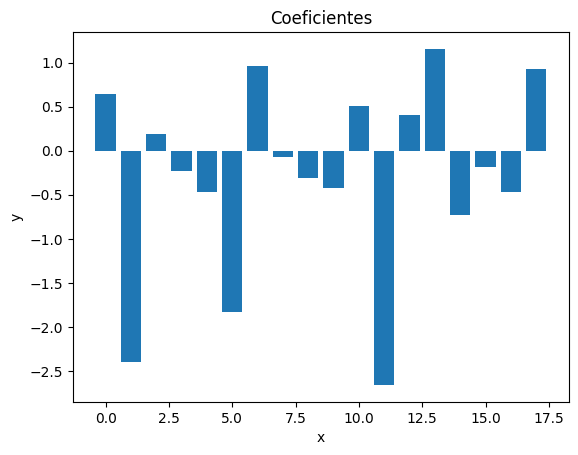

In [44]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [45]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.        , 0.        , 0.75524712, ..., 0.        , 0.        ,
        0.66666667],
       [0.        , 0.        , 0.70040623, ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.        , 0.59749492, ..., 0.        , 0.        ,
        0.66666667],
       ...,
       [0.        , 0.        , 0.61882194, ..., 0.        , 0.        ,
        0.66666667],
       [0.06498207, 0.12300116, 0.59817197, ..., 0.        , 0.        ,
        0.66666667],
       [0.        , 0.        , 0.859174  , ..., 0.        , 0.        ,
        1.        ]])

In [46]:
X_test.shape

(800, 18)

In [47]:
predictions = model.predict(X_test)

In [48]:
predictions

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,

In [49]:
test["predicciones"]=predictions
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,rel_conceptuales,negT,negH,overlap_ent,clases,predicciones
0,0.000000,0.000000,2.231,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.400000,0,0,0,0.666667,YES,1
1,0.000000,0.000000,2.069,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.800000,0,0,0,0.333333,YES,1
2,0.000000,0.000000,1.765,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,14,0.500000,0,0,0,0.666667,YES,1
3,0.000000,0.000000,2.012,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,20,0.666667,0,0,0,1.000000,YES,1
4,1.274136,1.457741,1.691,1.921,3.880129,0.004272,0.201056,0,0.058824,0,4,1,20,0.000000,0,0,0,1.000000,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,2.198,0.000,0.000000,0.000000,0.000000,1,0.000000,1,5,0,19,0.400000,0,1,0,0.500000,YES,1
796,0.000000,0.000000,1.580,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,25,0.666667,0,0,0,0.333333,NO,1
797,0.000000,0.000000,1.828,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,24,0.000000,0,0,0,0.666667,UNKNOWN,1
798,0.321690,1.443915,1.767,0.985,3.774718,0.005778,0.129923,0,0.142857,0,4,1,10,0.500000,0,0,0,0.666667,UNKNOWN,0


In [50]:
incorrectos = test[(test["clases"]=="YES") & (test["predicciones"]==0)]
incorrectos

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,rel_conceptuales,negT,negH,overlap_ent,clases,predicciones
5,0.759160,1.395848,1.724,1.664,3.831012e+00,0.005715,0.377998,0,0.142857,0,4,1,10,0.500000,0,0,0,0.666667,YES,0
22,1.188848,1.448923,1.326,1.333,3.779162e+00,0.005849,0.332121,0,0.058824,0,4,1,21,0.250000,0,0,0,1.000000,YES,0
30,0.320906,1.470049,1.659,1.484,3.820110e+00,0.003708,0.111502,0,0.058824,0,5,1,21,0.400000,0,0,0,0.750000,YES,0
32,0.382150,1.433030,1.657,0.881,3.809989e+00,0.005280,0.096198,0,0.100000,0,4,1,15,0.500000,0,0,0,0.666667,YES,0
42,0.000000,1.000097,1.803,0.000,8.419931e-13,0.042296,0.000000,2,0.083333,0,7,1,19,0.428571,0,0,0,0.500000,YES,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,0.071607,7.279428,1.788,0.722,3.930161e+00,0.006455,0.046550,2,1.250000,0,17,5,16,0.235294,0,0,0,0.375000,YES,0
757,0.522329,1.431088,1.915,1.224,3.933145e+00,0.006011,0.219502,0,0.111111,0,6,1,14,0.833333,0,0,0,0.333333,YES,0
776,0.000000,0.000000,1.807,0.000,0.000000e+00,0.000000,0.000000,0,0.000000,0,7,0,16,0.000000,1,0,0,0.666667,YES,0
777,0.426641,1.456292,1.997,1.571,3.706484e+00,0.005312,0.190190,1,0.100000,0,5,1,14,0.800000,0,0,0,0.500000,YES,0


In [ ]:
[[238 152]
 [123 287]]

In [51]:
print(confusion_matrix(y_test, predictions))

[[249 141]
 [129 281]]


In [52]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.66
precision:  0.67
recall 0.69
f1_score:  0.68
matthews_score:  0.32


In [53]:
X_train.shape

(800, 18)

In [54]:
X_test.shape

(800, 18)

In [55]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [56]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [57]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.690000 (0.113745)
Logistic Regression Precision:: 0.700000 (0.115397)
Logistic Regression Recall:: 0.760000 (0.099066)
Logistic Regression F1-score:: 0.720000 (0.081348)


In [58]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.690000 (0.120028)
Logistic Regression Recall:: 0.690000 (0.113745)
Logistic Regression F1-score:: 0.680000 (0.130484)


In [58]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.700000 (0.115323)
Logistic Regression Recall:: 0.700000 (0.113571)
Logistic Regression F1-score:: 0.690000 (0.129139)


In [60]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.700000 (0.109060)
Logistic Regression Recall:: 0.700000 (0.109060)
Logistic Regression F1-score:: 0.700000 (0.109060)


In [61]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.380000 (0.242381)


In [55]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [56]:
#linear_model

In [81]:
#model = LogisticRegression()
#model.fit(X_train,y_train)

In [62]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.66      0.61      0.63       390
           1       0.65      0.70      0.68       410

    accuracy                           0.66       800
   macro avg       0.66      0.66      0.65       800
weighted avg       0.66      0.66      0.66       800



In [59]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [60]:
test.columns[:-1]

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent', 'clases'],
      dtype='object')

In [61]:
explainer.expected_value

-0.1637737151522033

In [62]:
X_test

array([[0.        , 0.        , 0.75524712, ..., 0.        , 0.        ,
        0.66666667],
       [0.        , 0.        , 0.70040623, ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.        , 0.59749492, ..., 0.        , 0.        ,
        0.66666667],
       ...,
       [0.        , 0.        , 0.61882194, ..., 0.        , 0.        ,
        0.66666667],
       [0.06309664, 0.14040234, 0.59817197, ..., 0.        , 0.        ,
        0.66666667],
       [0.        , 0.        , 0.859174  , ..., 0.        , 0.        ,
        1.        ]])

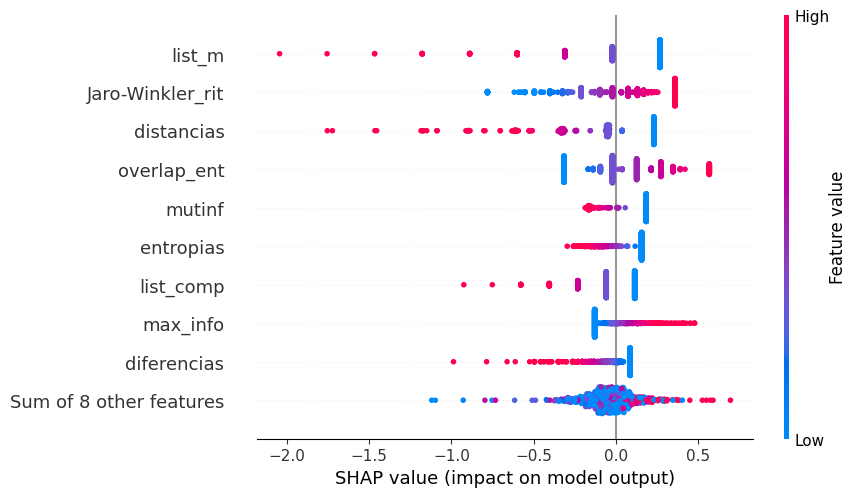

In [63]:
shap.plots.beeswarm(shap_values)

In [64]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.         0.         0.44482058 0.         0.         0.
 0.         0.16666667 0.         0.         0.29411765 0.
 0.39285714 1.         0.         0.         0.33333333] 0 1


IndexError: index 17 is out of bounds for axis 0 with size 17

In [65]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.         0.         0.57684496 0.         0.         0.
 0.         0.         0.         0.         0.29411765 0.
 0.42857143 1.         0.         0.         0.66666667]


IndexError: index 1 is out of bounds for axis 2 with size 1

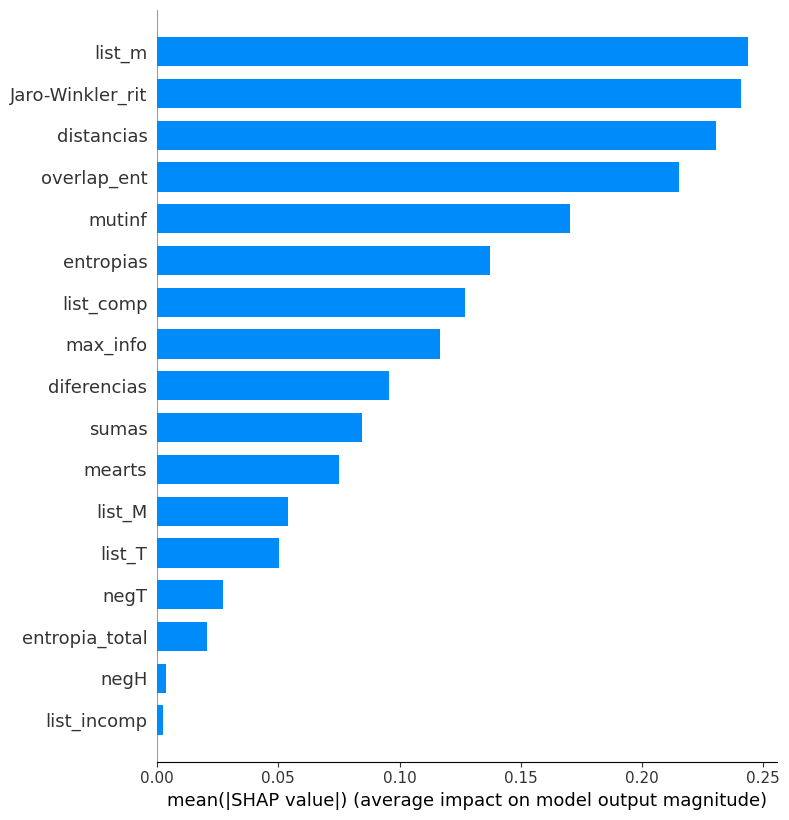

In [66]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

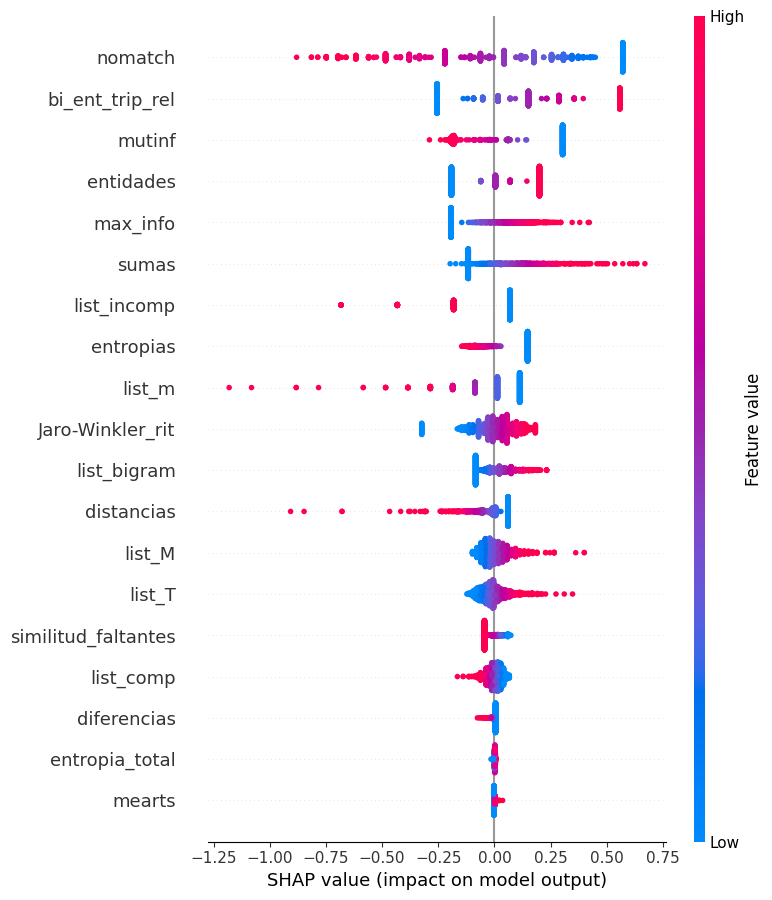

In [96]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

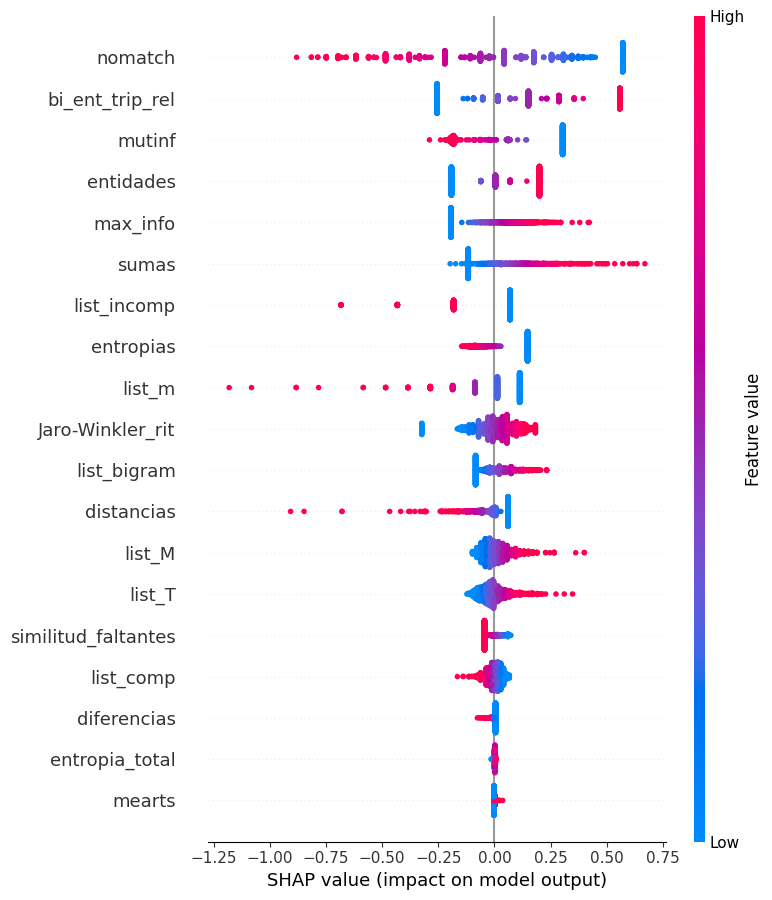

In [97]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

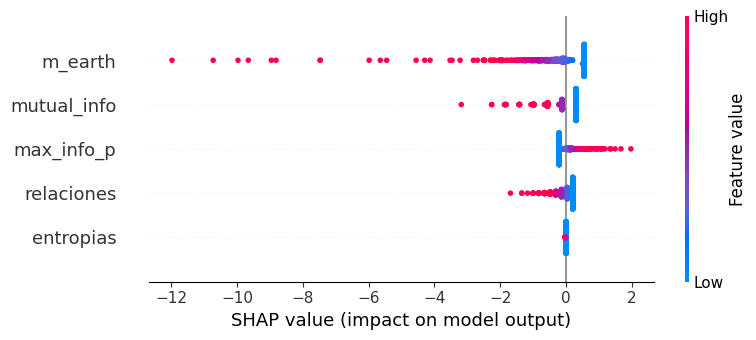

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.58
precision:  0.63
recall 0.42
f1_score:  0.51
matthews_score:  0.17


In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.550000 (0.081558)
DecisionTree: 0.670000 (0.067294)
DecisionTree: 0.580000 (0.060962)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[287, 103],
       [236, 174]])

Profundidad del árbol: 23
Número de nodos terminales: 152


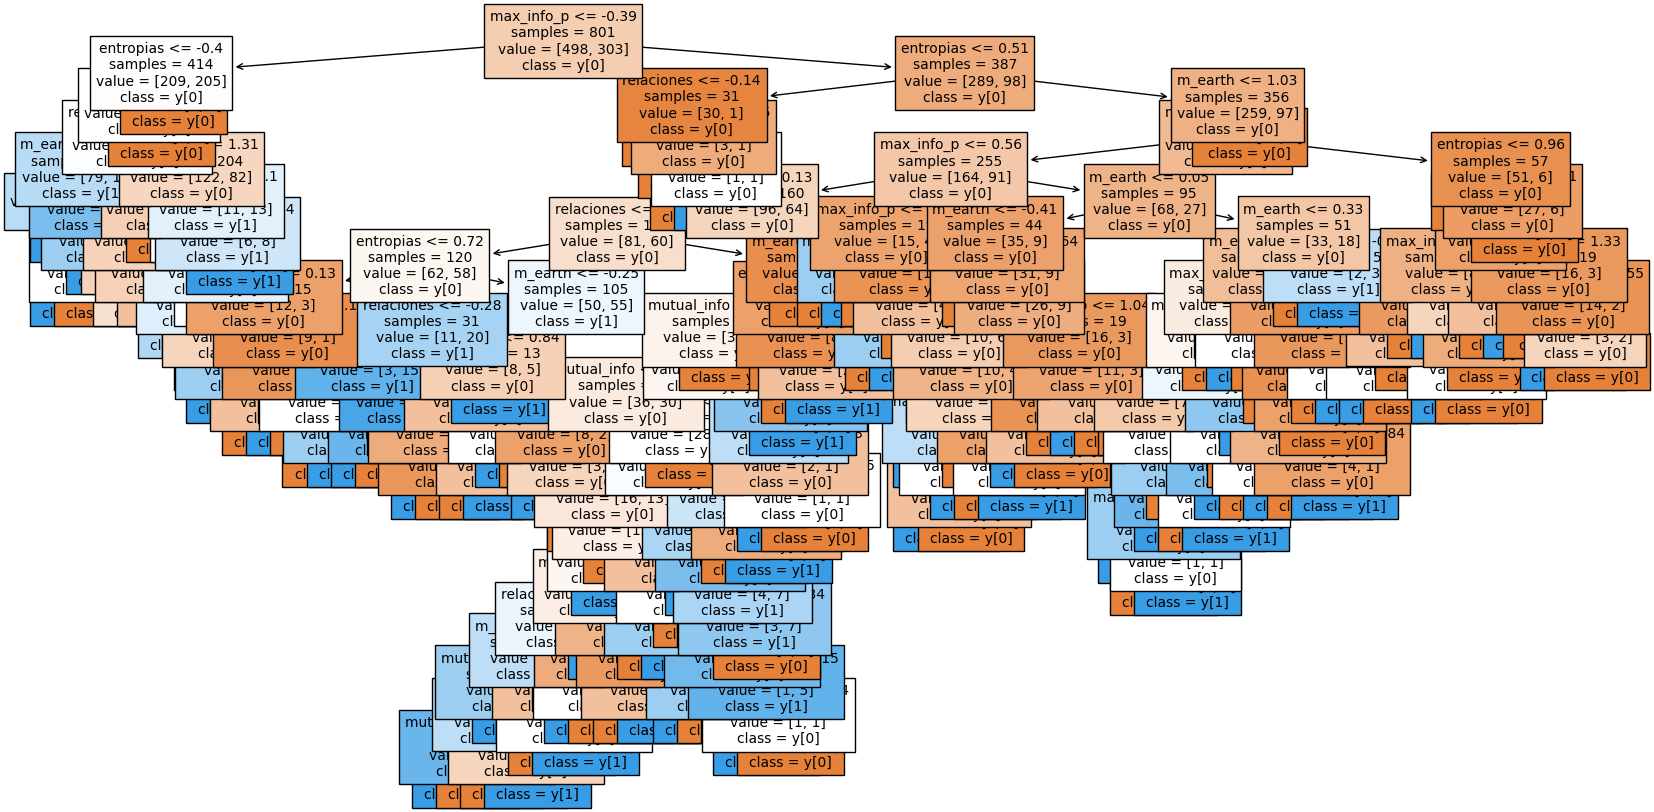

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )